In [1]:
import torch
import torch.nn as nn
import numpy as np

# Set LSTM Parameters

In [2]:
input_size  =  9 # number of features to extract
hidden_size = 16 # number of units in the hidden state
num_layers  =  2 # number of vertical stacks of hidden layers

# Create an LSTM instance

lstm = nn.LSTM(input_size,hidden_size,num_layers, batch_first = True)
lstm

LSTM(9, 16, num_layers=2, batch_first=True)

# Create Data

In [3]:
seqlength = 5
batchsize = 2

X = torch.rand(batchsize, seqlength, input_size)

# create initial hidden states (typically initialized as zeros)

H = torch.zeros(num_layers,batchsize,hidden_size)
C = torch.zeros(num_layers,batchsize,hidden_size)

hiddeninputs = (H,C)

# Run the Model

y, (h,c) = lstm(X,hiddeninputs)
print(f'Input shape: {list(X.shape)}')
print(f'Hidden shape: {list(h.shape)}')
print(f'Cell memory shape: {list(c.shape)}')
print(f'Output shape: {list(y.shape)}')

Input shape: [2, 5, 9]
Hidden shape: [2, 2, 16]
Cell memory shape: [2, 2, 16]
Output shape: [2, 5, 16]


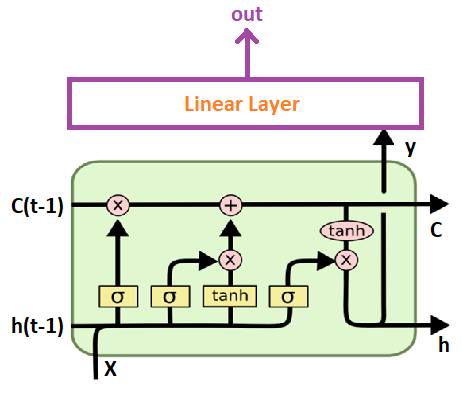

# Create LSTM model Using Class

In [4]:
class LSTM_model(nn.Module):
  def __init__(self,input_size,num_hidden,num_layers):
    super().__init__()

    # Define Parameters

    self.input_size = input_size
    self.num_hidden = num_hidden
    self.num_layers = num_layers

    # LSTM Layer

    self.lstm = nn.LSTM(input_size,num_hidden,num_layers, batch_first = True)

    # Output Layer (For prediction OR Classification)

    self.out = nn.Linear(num_hidden,1) # 1 = An output size OR number of categories required at output

  def forward(self,x): # There is no hidden at the input of forward, so we cannot input hidden while training model

    # Passing Data through LSTM

    y,(h,c) = self.lstm(x)

    # Pass the LSTM output through the  output layer
    out = self.out(y)

    return out, (h,c)

# Create the Instance of LSTM model

In [5]:
model = LSTM_model(input_size, hidden_size, num_layers)

#Creating Data and Run the LSTM model

In [6]:
X = torch.rand(batchsize,seqlength,input_size)
y = torch.rand(batchsize,seqlength,1)


ypred, (h,c) = model(X)
print(" ")
print(" ")
print(X.shape)
print(y.shape)

print(" ")
print(" ")

lossfunc = nn.MSELoss()
lossfunc(ypred,y)

 
 
torch.Size([2, 5, 9])
torch.Size([2, 5, 1])
 
 


tensor(0.2152, grad_fn=<MseLossBackward0>)

In [7]:
h.shape # Hidden cell

torch.Size([2, 2, 16])

In [8]:
c.shape # Memory cell

torch.Size([2, 2, 16])